In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\Coordcontrol1_P2_7_17_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\video_time\control1_P2_7_17_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\stimulus_time\control1_P2_7_17_24_stimulus_time0.csv'

north_pixel = 109
south_pixel = 429
east_pixel = 489
west_pixel = 148
shelter_x_pixel = 329
shelter_y_pixel = 407

#estimate for when mouse reaches shelter
escape_done = 2.84 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
sigma = 2

In [5]:
#read in DLC data, convert to cm, center platform at 0,0
#return converted coordinates for all 
shelter_x, shelter_y, x_diam, y_diam, coords = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [6]:
#replace any head, nose, or center points with likelihood < .9 with NA
#coords dataframe is filled with NA when LT<.9, coords_scaled has interpolated data (compare in graphs)
coord_scaled = filter_data(.9, coords)

In [7]:
#add time in seconds for both coords (na values) and coord_scaled (interpolated)
#results in given dataframe with time in seconds zeroed at stimulus onset. choose which stimulus to look at
convert_time(time_path, coord_scaled, audio_path, 2)
convert_time(time_path, coords, audio_path, 2)

In [8]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
#end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [9]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)
displacement(shelter_x, shelter_y, coords)

In [10]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
#return total distance for linearity calculations
total_distance = speed(coord_scaled)
total_distance_coords = speed(coords)

In [11]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)
angle(shelter_x, shelter_y, coords)


In [12]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)
angle_speed(coords)

In [13]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
time_range = dataframe_ranges(-4, 8, coord_scaled)
time_range_coords = dataframe_ranges(-7, 8, coords)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

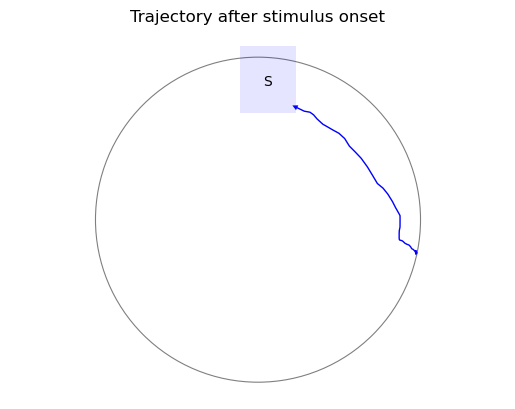

In [14]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

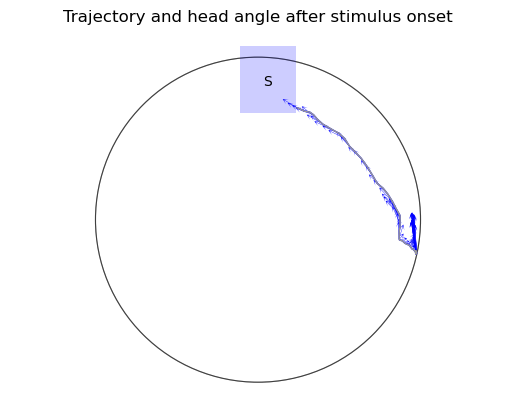

In [15]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

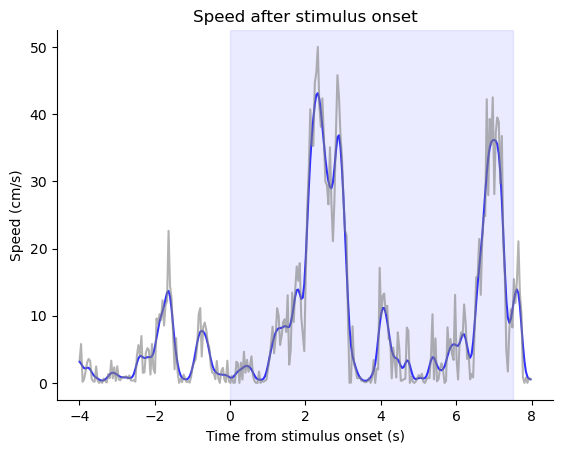

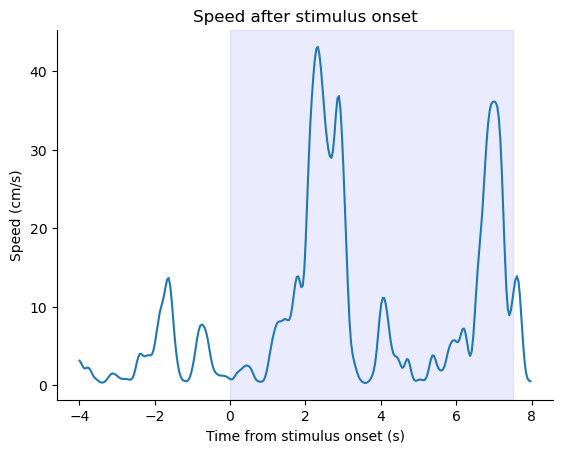

In [16]:
speed_figure(-4, 8, coord_scaled, False, True, sigma)
speed_figure(-4, 8, coord_scaled, True, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

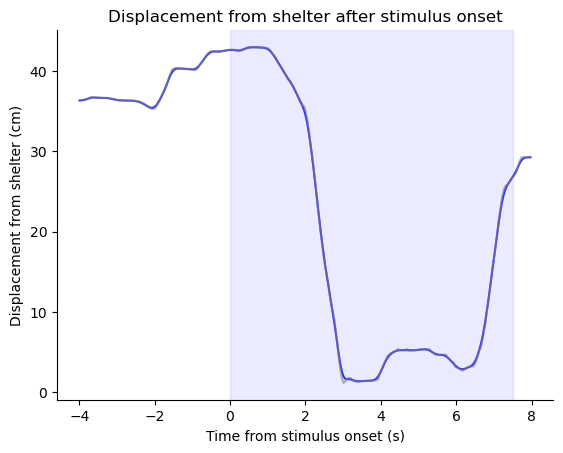

In [17]:
displacement_figure(-4, 8, coord_scaled, False, True, sigma) #interpolated NA values 

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

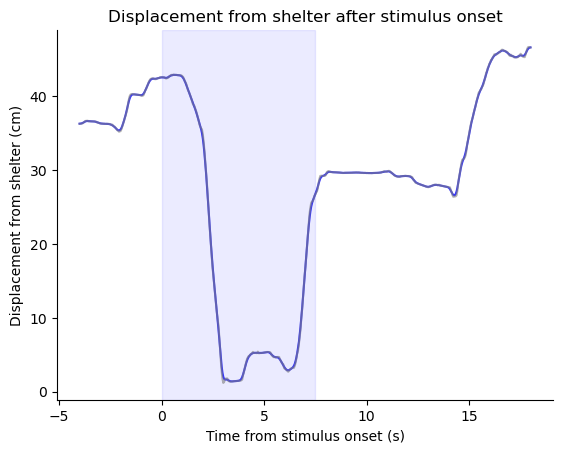

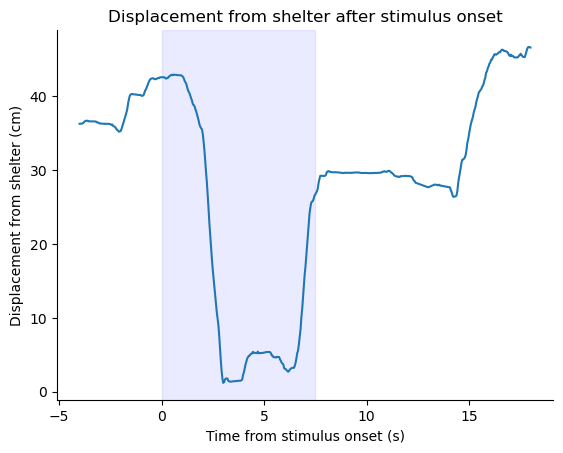

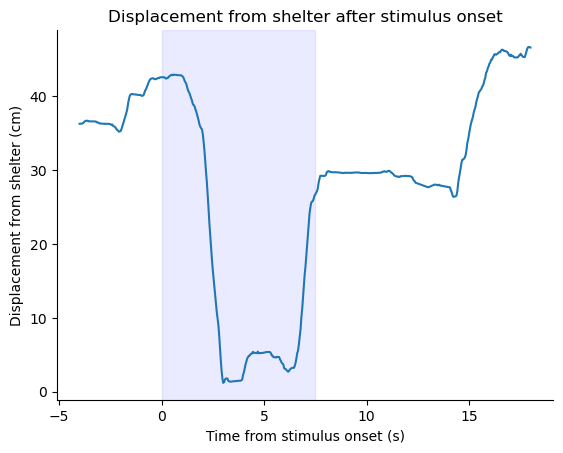

In [18]:
displacement_figure(-4, 18,coord_scaled, False, True, sigma)
displacement_figure(-4, 18,coord_scaled, False, False, sigma)

displacement_figure(-4, 18,coord_scaled, False, False, sigma)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

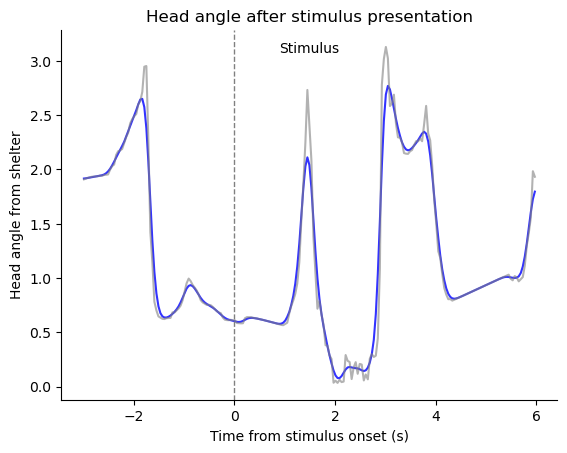

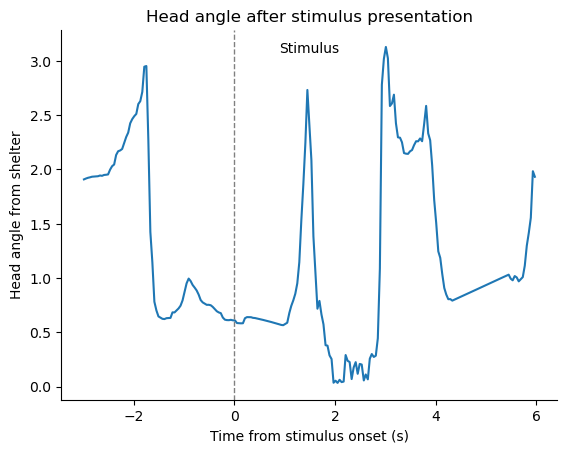

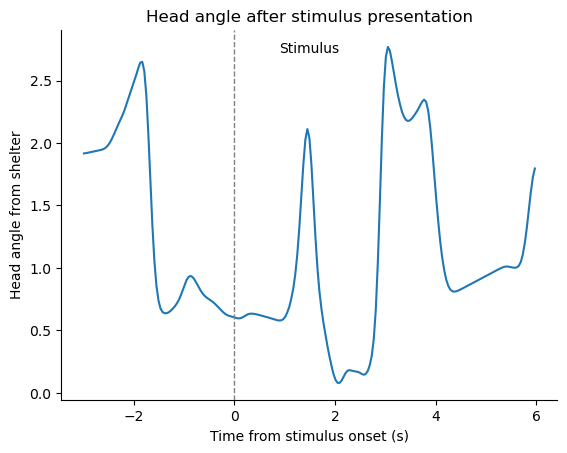

In [19]:
head_angle_figure(-3, 6,coord_scaled, False, True, sigma)
head_angle_figure(-3, 6,coord_scaled, False, False, sigma)
head_angle_figure(-3, 6,coord_scaled, True, True, sigma)


In [20]:
ratio, initial_displacement, total_distance = linearity_ratio(0, escape_done, coord_scaled)

In [21]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coords)

In [22]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9497,9497,9497,NaN,NaN,0.000416,31.148122,-7.603292,0.972163,31.869113,-7.317794,...,0.999586,27.524214,-3.109596,0.999601,0.011276,42.607289,0.000000,0.000000,NaN,NaN
9498,9498,9498,NaN,NaN,0.000328,31.238635,-7.584999,0.977376,31.930086,-7.304551,...,0.999417,27.507165,-3.189356,0.999347,0.049497,42.613562,1.049036,0.040095,NaN,NaN
9499,9499,9499,NaN,NaN,0.000684,31.238635,-7.563879,0.979894,31.960008,-7.253837,...,0.999090,27.507165,-3.189356,0.999173,0.089152,42.614001,0.016933,0.000671,NaN,NaN
9500,9500,9500,NaN,NaN,0.000572,31.238635,-7.563879,0.991919,31.960008,-7.253837,...,0.999538,27.507165,-3.189356,0.999533,0.129164,42.612939,0.035039,0.001402,NaN,NaN
9501,9501,9501,NaN,NaN,0.000322,31.230533,-7.563879,0.985438,31.960008,-7.223063,...,0.999229,27.503191,-2.806375,0.999049,0.169177,42.517123,3.149441,0.126019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9692,9692,9692,NaN,NaN,0.302907,-27.841031,14.228346,0.999937,-27.258337,13.329951,...,0.999987,-22.427723,17.684332,0.999957,7.811315,29.256763,0.000000,0.000000,NaN,NaN
9693,9693,9693,NaN,NaN,0.391025,-27.842966,14.215937,0.999954,-27.273254,13.322639,...,0.999980,-22.427723,17.737794,0.999945,7.851059,29.230287,0.803919,0.031951,NaN,NaN
9694,9694,9694,NaN,NaN,0.343085,-27.842966,14.228346,0.999955,-27.273254,13.330614,...,0.999984,-22.417629,17.737794,0.999944,7.891123,29.230287,0.000000,0.000000,NaN,NaN
9695,9695,9695,NaN,NaN,0.367414,-27.864147,14.228346,0.999943,-27.289691,13.342331,...,0.999984,-22.448741,17.737794,0.999950,7.931084,29.238344,0.743467,0.029710,NaN,NaN


In [23]:

rotate, shelter_rotate_x, shelter_rotate_y = align_shelter(shelter_x, shelter_y, 0, escape_done, coord_scaled)
#normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)


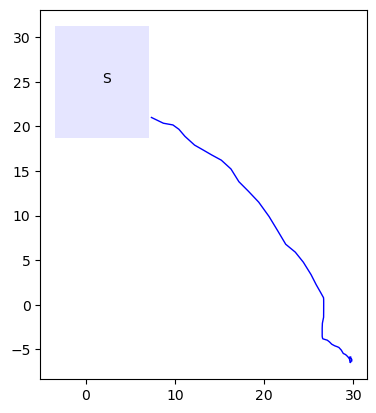

In [24]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


In [25]:
coord_scaled_smooth = smooth_curve(sigma, coord_scaled)
